# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [48]:
pth1 = 'real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong') 

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [50]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23421,9,4150000.0,53.0,2018-01-14T00:00:00,2,2.70,22.0,30.0,6,NaN,...,9.0,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,9.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.00,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
15398,15,7250000.0,68.0,2017-10-02T00:00:00,2,2.51,14.0,36.0,3,False,...,15.5,2.0,Санкт-Петербург,35396.0,11525.0,0.0,NaN,3.0,690.0,352.0
5026,10,5150000.0,37.7,2018-07-13T00:00:00,1,2.70,24.0,19.0,22,NaN,...,10.0,2.0,Санкт-Петербург,11425.0,13107.0,0.0,NaN,0.0,NaN,48.0
7357,11,5150000.0,62.0,2016-04-07T00:00:00,3,2.60,9.0,40.0,7,NaN,...,10.0,1.0,Санкт-Петербург,28713.0,11034.0,1.0,204.0,0.0,NaN,616.0
13820,12,4000000.0,42.0,2016-10-04T00:00:00,1,2.85,22.0,21.0,8,NaN,...,11.0,2.0,Санкт-Петербург,34620.0,12036.0,0.0,NaN,0.0,NaN,414.0
6660,12,5950000.0,70.0,2017-11-02T00:00:00,3,3.00,6.0,50.0,2,NaN,...,10.0,NaN,Санкт-Петербург,19807.0,5016.0,1.0,742.0,1.0,215.0,276.0
7621,8,1750000.0,42.3,2017-09-19T00:00:00,2,2.60,2.0,28.0,1,NaN,...,6.0,NaN,поселок Гончарово,NaN,NaN,NaN,NaN,NaN,NaN,191.0
10008,20,5050000.0,44.2,2017-09-14T00:00:00,0,2.70,9.0,32.2,1,NaN,...,NaN,NaN,Санкт-Петербург,24329.0,5955.0,0.0,NaN,2.0,520.0,69.0
21084,3,37000000.0,123.0,2017-11-18T00:00:00,3,3.00,7.0,97.0,5,NaN,...,15.0,NaN,Санкт-Петербург,32953.0,6045.0,2.0,519.0,3.0,755.0,118.0


In [51]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


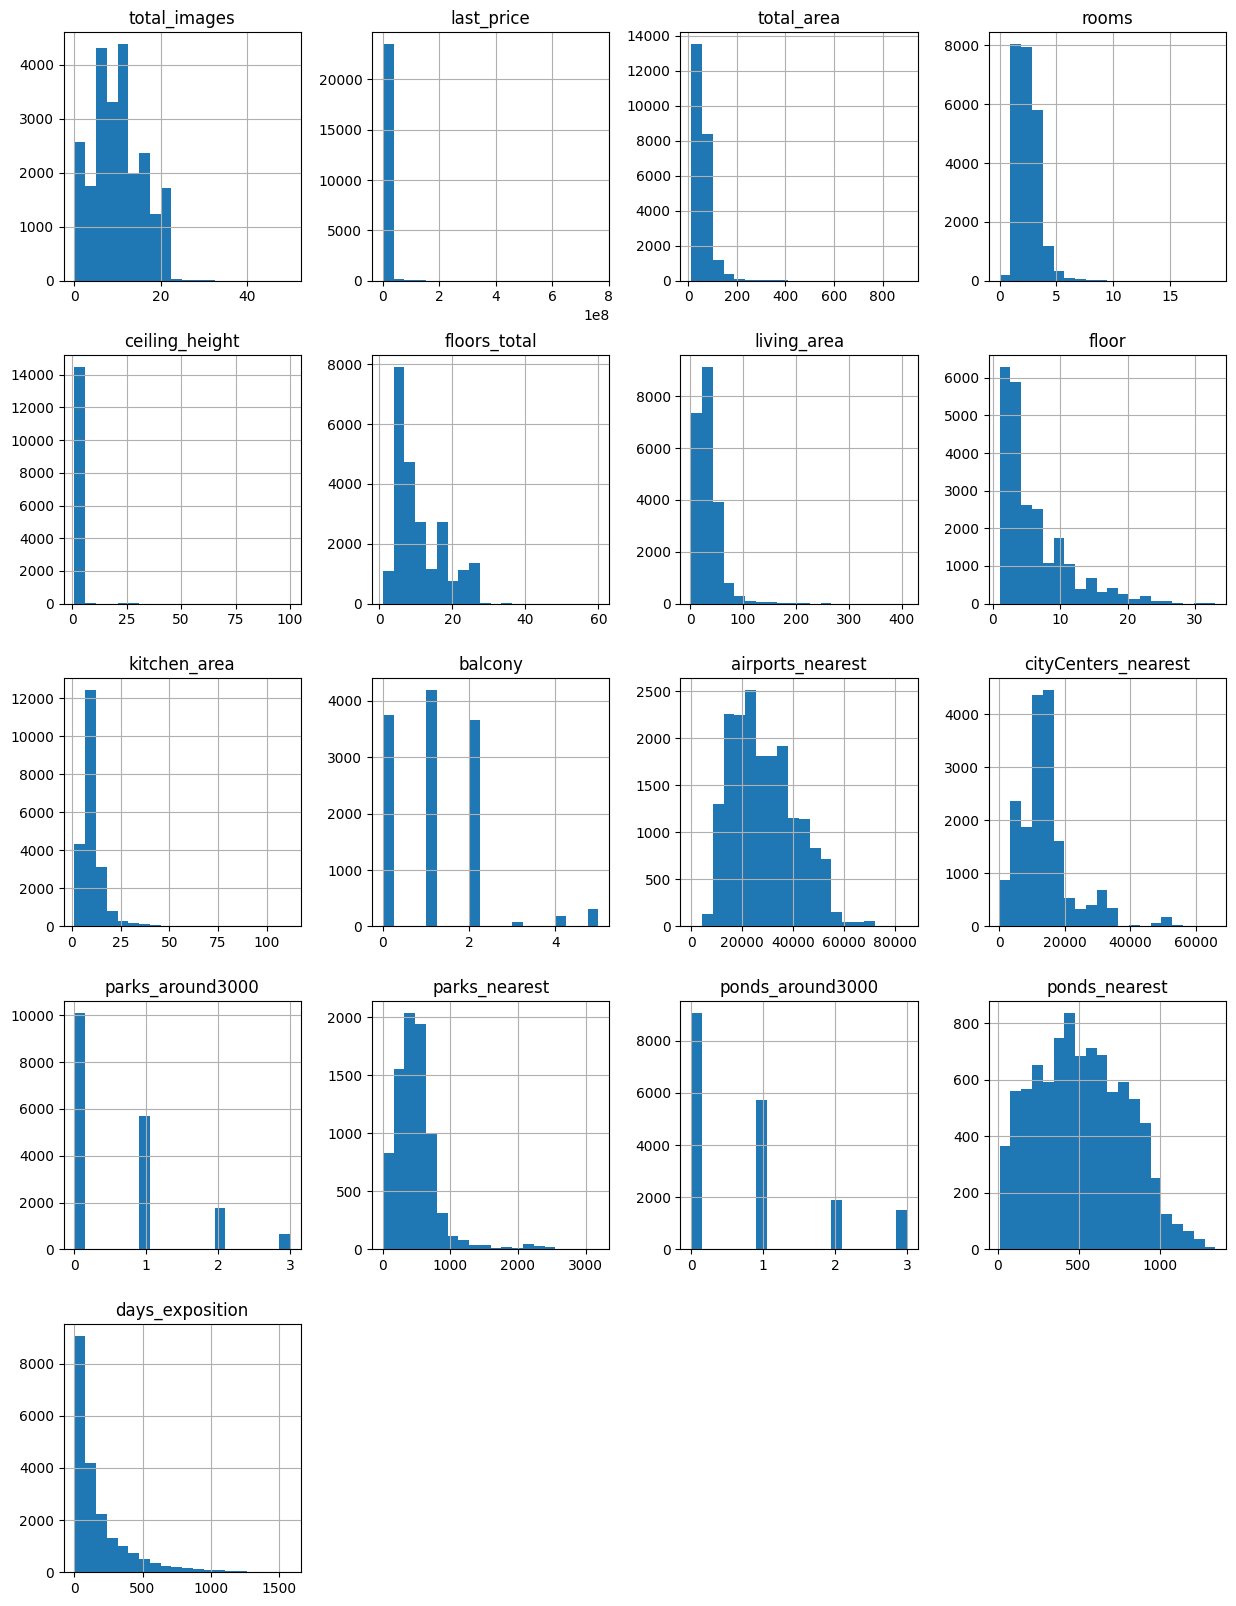

In [52]:
data.hist(bins=20, figsize=(15, 20));
plt.show()

### Предобработка данных

In [53]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [54]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


В 14 из 22 столбцах есть пропущенные значения. Больше всего пропусков по удаленности от парка / водоема, но эти данные автоматические, поэтому заменить их нечем и на анализ они не влияют. Кроме этого в столбцах last_price и is_appartment необходимо поменять тип данных на int и bool соотвественно.

#### Поиск явных дубликатов

In [55]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют. Займемся анализом о обработкой пропущенный значений.

#### Цена

Поменяем тип на int для удобства анализа

In [56]:
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

#### Высота потолков

In [57]:
data['ceiling_height'].sort_values(na_position='first').unique()

array([   nan,   1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,
         2.34,   2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,
         2.51,   2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,
         2.59,   2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,
         2.67,   2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,
         2.75,   2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,
         2.83,   2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,
         2.91,   2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,
         2.99,   3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,
         3.07,   3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,
         3.15,   3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,
         3.24,   3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,
         3.32,   3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,
         3.4 ,   3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,
      

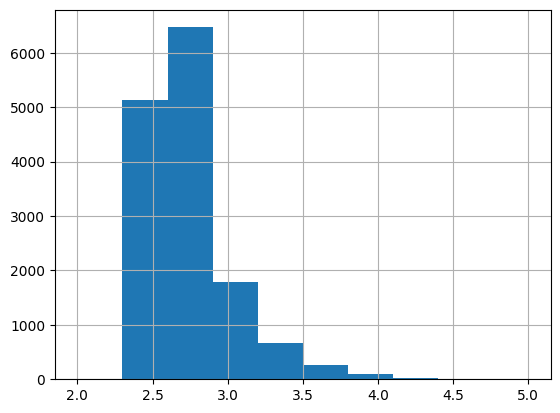

In [58]:
data['ceiling_height'].hist(range=(2,5))
plt.show()

У большинства квартир высота потолков в предалах 2,3 - 3,8 метров

In [59]:
data.query('ceiling_height < 3.8 and ceiling_height > 2.3')
med_ceiling_height = data['ceiling_height'].median()
print(med_ceiling_height)

2.65


Медиана равна 2,65 метров - вполне правдоподобно. Заменим все пропуски, а также значания, выходящие за пределы 2,3 - 3,8 медианой.

In [60]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']>2.3, med_ceiling_height)

In [61]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']<3.8, med_ceiling_height)

In [62]:
data['ceiling_height'].sort_values(na_position='first').unique()

array([2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08,
       3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 ,
       3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31,
       3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43,
       3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54,
       3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67,
       3.68, 3.69, 3.7 , 3.75, 3.76, 3.78])

#### Этажность дома

In [63]:
data['floors_total'].sort_values(na_position='first').unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 33., 34., 35., 36., 37., 52., 60.])

Пропусков не много - всего 86. Заменим их на медианное значение. 

In [64]:
data['floors_total'] = data['floors_total'].where(data['floors_total'] >= 1, data['floors_total'].median())

In [65]:
data['floors_total'].sort_values(na_position='first').unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60.])

#### Жилая площадь

In [66]:
data['living_area'].sort_values(na_position='first').unique()

array([  nan,   2. ,   3. , ..., 347.5, 409. , 409.7])

Жилая площадь - значимый показатель. Строки с такими пропусками разумнее удалить чтобы не искажать расчеты.

In [67]:
data = data.dropna(subset=['living_area'])

In [68]:
data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 347.5, 409. , 409.7])

#### Апартаменты

В этом столбце необходимо исправить тип данных на bool

In [69]:
data['is_apartment'] = data['is_apartment'].astype('bool') 

In [70]:
data['is_apartment'].isnull().sum()

0

#### Площадь кухни

In [71]:
# объявлений без площади кухонь
data['kitchen_area'].isnull().sum()

814

In [72]:
# допустим, что это студии, т.к. ниже выявили тенденцию роста квартир малых площадей, проверим площади этих квартир

data['total_area'][data['kitchen_area'].isnull()].sum()/data['total_area'][data['kitchen_area'].isnull()].count()

48.282039312039316

Средняя площадь таких квартир всего 46 кв. м. Предположение верно, поэтому заполним все пропуски по площадях кухонь 0

In [73]:
#data['kitchen_area'] = data['kitchen_area'].where(data['kitchen_area'] >= 0 , 0)
data['kitchen_area'] = data['kitchen_area'].fillna(value = 0)
data['kitchen_area'].isnull().sum()

0

#### Балконы

Если площадь балкона не указана, то будем считать его нет, т.е. она равна 0

In [74]:
data['balcony'] = data['balcony'].where(data['balcony'] > 0.0, 0.0)

In [75]:
data['balcony'].isnull().sum()

0

####  Название населённого пункта

Пропусков в этом столюце не много - 49, при этои расположение квартиры существенно влияет на цену. Удалим строки с пропусками.

In [76]:
data = data.dropna(subset=['locality_name'])

In [77]:
data['locality_name'].isnull().sum()

0

#### Расстояние до ближайшего аэропорта / до центра города / парка / водоема

Поскольку эти данные генерируются автоматически, логичную замену предложить невозможно

#### Число водоёмов в радиусе 3 км

In [78]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  1., nan,  3.])

Пропуски в данном столбце приравняем к 0.

In [79]:
data['ponds_around3000'] = data['ponds_around3000'].where(data['ponds_around3000'] > 0, 0)

In [80]:
data['ponds_around3000'].isnull().sum()

0

#### Сколько дней было размещено объявление (от публикации до снятия)

Строки с пропусками свидетельствуют о том, что квартира не продана по какой - либо причине. Возможно цена завышена или сложный объект. Для чистоты дальнейших расчетов удалим эти строки.

In [81]:
data = data.dropna(subset=['days_exposition'])

In [82]:
data['days_exposition'].isnull().sum()

0

#### Изучиь уникальные значения в столбце с названиями населенных пунктов и устраним неявные дубликаты

In [83]:
data['locality_name'].sort_values(na_position='first').unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Никольское', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Фёдоровское', 'городской посёлок Янино-1',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'дер

Для начала все буквы 'ё' заменим на 'е'

In [84]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace('поселок городского типа', 'городской поселок', regex=True)
    .replace('поселок при железнодорожной станции', 'поселок станции', regex=True)
) 

In [85]:
data['locality_name'].sort_values(na_position='first').unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Никольское', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалево', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Важины', 'городской поселок Виллози',
       'городской поселок Вознесенье', 'городской поселок Вырица',
       'городской поселок Дружная Горка', 'городской поселок Дубровка',
       'городской поселок Ефимовский', 'городской поселок Кондратьево',
       'городской поселок Красный Бор', 'городской посело

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Можно например вот так:
    
    df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

    len(df.locality_name.unique())
    
</div>

#### Итоговая таблица - первые 10 строк

In [86]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,True,...,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,True,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,True,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,True,...,9.10,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,0.0,NaN,55.0
6,6,3700000,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,True,...,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,True,...,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,0.0,NaN,189.0
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,True,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,True,...,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
11,9,3300000,44.00,2018-08-27T00:00:00,2,2.65,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,True,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,0.0,NaN,90.0


<div> <b>Вывод:</b> На втором этапе провели предобработку данных. Проверили на наличие явных дубликатов, привели данные к нужному типу, заполнили пропуски где было возможно, удалили строки с пропусками, которые бы мешалди дальнейшему анализу.</div>

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метр

In [87]:
data['price_per_1m'] = (data['last_price'] / data['total_area']).round(2)

#### День публикации объявления

In [88]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [89]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#### Месяц публикации объявления

In [90]:
data['month_exposition'] = data['first_day_exposition'].dt.month

#### Год публикации объявления

In [91]:
data['year_exposition'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры

In [92]:
data['floor_type'] = (data['floor']
    .where(data['floor']!=1, 'первый').where(data['floor']!= data['floors_total'], 'последний')
    .where((data['floor']==1)|(data['floor']==data['floors_total']), 'другой'))

#### Расстояние в км до центра города

In [93]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round(0)

#### Итоговая таблица - первые 10 строк

In [94]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1m,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,...,NaN,0.0,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,...,NaN,0.0,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,True,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0
11,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,NaN,0.0,NaN,7.0,75000.00,0,8,2018,другой,52.0
12,10,3890000,54.00,2016-06-30,2,2.65,5.0,30.00,5,True,...,NaN,0.0,NaN,90.0,72037.04,3,6,2016,последний,NaN


### Проведите исследовательский анализ данных

#### Общая площадь

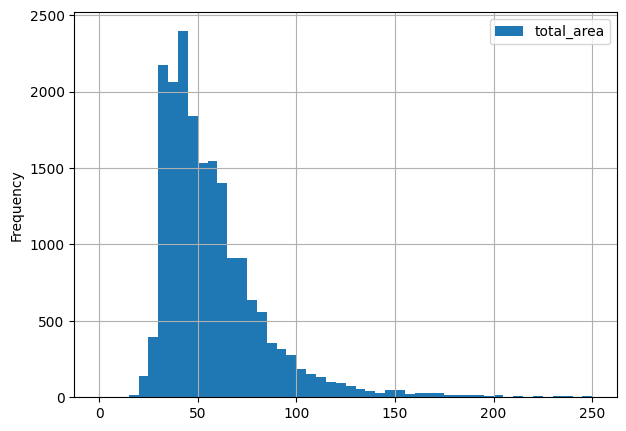

In [95]:
# data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (0,400))
# сократим range
data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (0,250))
plt.show()

In [96]:
data['total_area'].describe()

count    18770.000000
mean        58.671777
std         33.639027
min         12.000000
25%         39.400000
50%         50.700000
75%         67.700000
max        900.000000
Name: total_area, dtype: float64

По гистограмме распределение данных нормальное, есть выбросы но они не сильно влияют на данные. Данные discribe также выглядят вполне правдоподобными, средняя величина квартиры 50 кв.м.

#### Жилая площадь

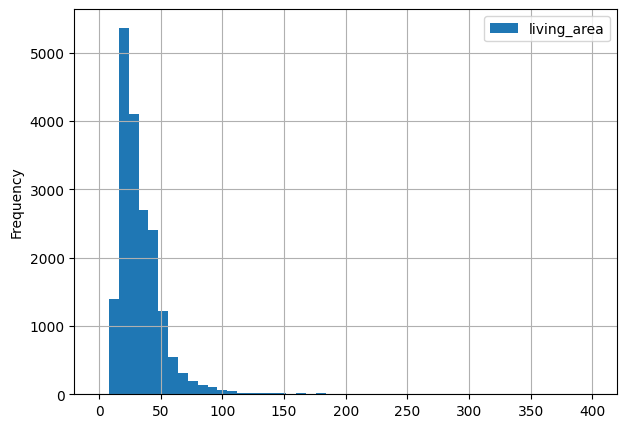

In [97]:
data.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (0,400))
plt.show()

In [98]:
data['living_area'].describe()

count    18770.000000
mean        33.525704
std         21.323309
min          2.000000
25%         18.300000
50%         30.000000
75%         41.575000
max        409.700000
Name: living_area, dtype: float64

Распределение даных аналогично общей площади, также есть выбросы, например, минимальные значения точно неправдоподобны. 

#### Площадь кухни

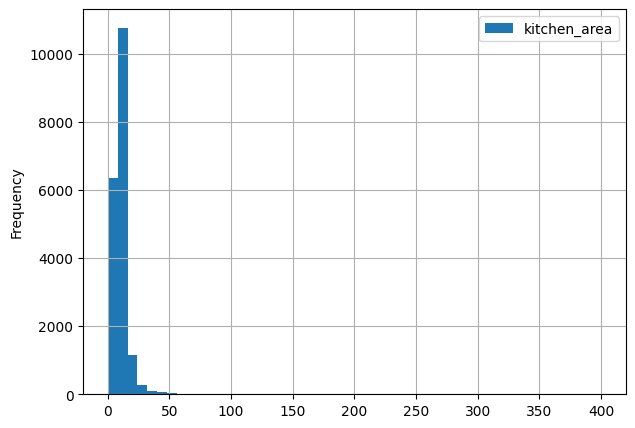

In [99]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (0,400))
plt.show()

In [100]:
data['kitchen_area'].describe()

count    18770.000000
mean         9.990400
std          5.876134
min          0.000000
25%          7.000000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

Распределение выглядит правдоподобным, опять минимальная площадь в 2 кв.м. выбивается. В остальном вполне реально. 

#### Цена

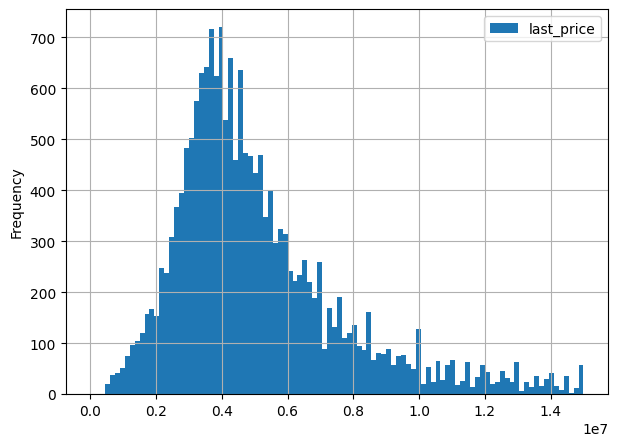

In [101]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (7,5))
plt.show()

In [102]:
data['last_price'].describe()

count    1.877000e+04
mean     6.242008e+06
std      1.089930e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

ПОЧЕМУ данные слетели? float вместо int

#### Количество комнат

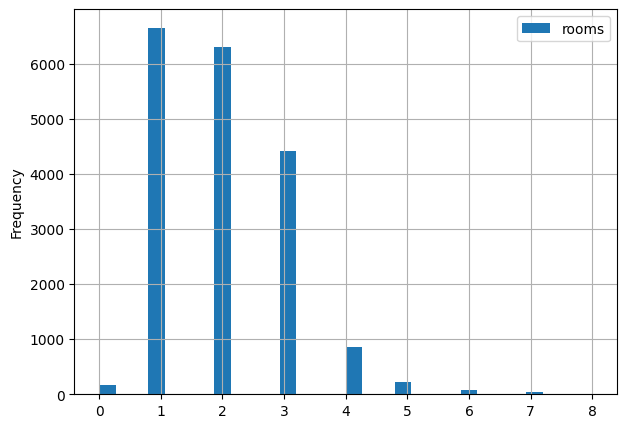

In [103]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (7,5), range = (0,8))
plt.show()

In [104]:
data['rooms'].describe()

count    18770.000000
mean         2.023335
std          1.057205
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир. Минимальное значение = 0 - уточнить что это, м.б. студия или доля в квартире?

In [105]:
data[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1m,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
144,1,2450000,27.00,2017-03-30,0,2.65,24.0,15.50,2,True,...,NaN,0.0,NaN,181.0,90740.74,3,3,2017,другой,NaN
349,4,2320000,25.00,2017-09-27,0,2.65,14.0,17.00,1,True,...,NaN,0.0,NaN,45.0,92800.00,2,9,2017,первый,NaN
440,8,2480000,27.11,2018-03-12,0,2.65,17.0,24.75,4,True,...,NaN,2.0,982.0,64.0,91479.16,0,3,2018,другой,15.0
508,0,3375000,34.40,2017-03-28,0,2.65,26.0,24.30,19,True,...,NaN,1.0,593.0,430.0,98110.47,1,3,2017,другой,19.0
697,12,2500000,24.10,2017-12-01,0,2.75,25.0,17.50,21,True,...,NaN,0.0,NaN,201.0,103734.44,4,12,2017,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22877,2,4280000,28.00,2017-10-26,0,2.70,19.0,18.00,10,True,...,NaN,1.0,415.0,151.0,152857.14,3,10,2017,другой,7.0
23210,7,3200000,26.00,2017-09-01,0,2.65,25.0,18.00,16,True,...,NaN,1.0,623.0,14.0,123076.92,4,9,2017,другой,13.0
23442,0,2500000,27.70,2017-09-28,0,2.65,24.0,18.00,4,True,...,NaN,0.0,NaN,4.0,90252.71,3,9,2017,другой,NaN
23592,10,1450000,29.00,2017-11-11,0,2.65,9.0,18.00,8,True,...,NaN,0.0,NaN,82.0,50000.00,5,11,2017,другой,NaN


#### Типа этажа, на котором расположена квартира

In [106]:
floor_type = data.pivot_table(index='floor_type', values = 'floor', aggfunc= 'count') 
floor_type

,floor
floor_type,
другой,13948
первый,2217
последний,2605


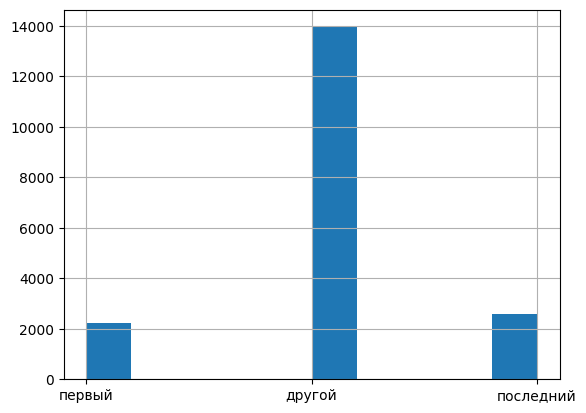

In [141]:
data['floor_type'].hist()
plt.show()

Данные реалистичны. Примерно треть квартир расположена на первых и последних этажах.

#### Даты размещения

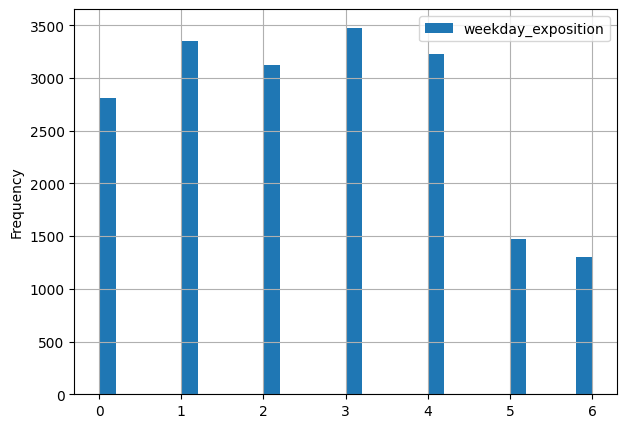

In [142]:
data.plot(y = 'weekday_exposition', kind = 'hist', bins = 30, grid=True, figsize = (7,5))
plt.show()

Чаще объявления о продаже квартир размещают среди недели, больше всего в четверг. В выходные заметен явный спад. Очевидно агенства недвижимости по выходным работают в сокращенном режиме дежурств.

<Axes: ylabel='Frequency'>

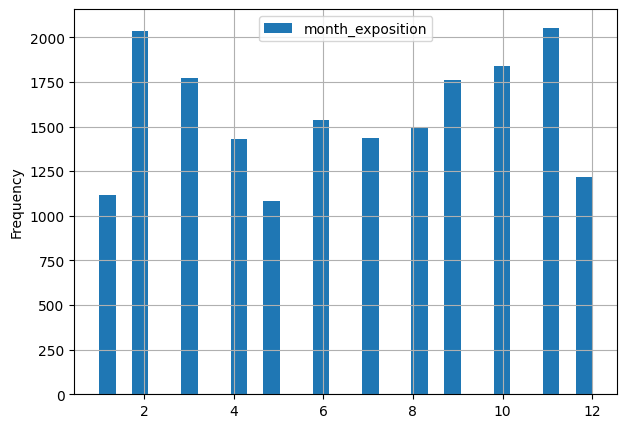

In [109]:
data.plot(y = 'month_exposition', kind = 'hist', bins = 30, grid=True, figsize = (7,5))

Набольшее количество объявлений приходится на февраль и ноябрь. Заметен плавный спад к лету и более резкий спад в период новогодних праздников.

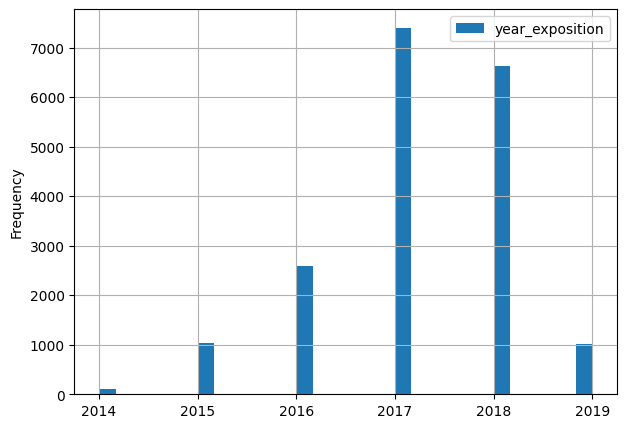

In [143]:
data.plot(y = 'year_exposition', kind = 'hist', bins = 30, grid=True, figsize = (7,5))
plt.show()

Резкий скачок продаж приходится на 2017 и 2018 гг. В 2019 году такой же резкий спад (возможно учтен не весь год?)

#### Оценим как быстро продавались квартиры

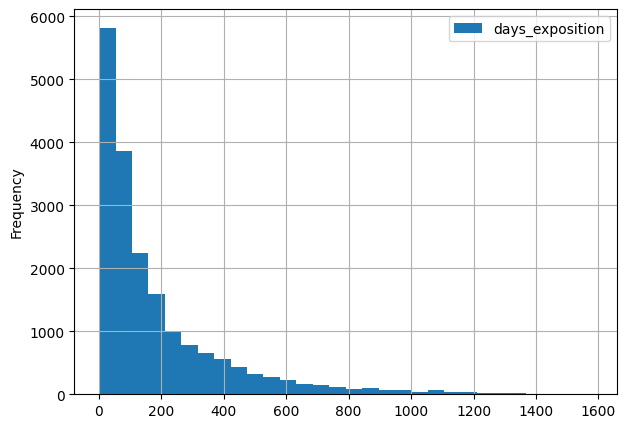

In [144]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, figsize = (7,5))
plt.show()

In [112]:
data['days_exposition'].describe()

count    18770.000000
mean       184.745978
std        221.267454
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продавались 6 мес. (184 дня), при этом половина квартир была продана в течение 3,5 мес (101 день). Максимальный срок продажи составляет пости 4,5 года. Быстрой продажей квартиры можно назвать срок в 2 месяца.

Рассмотрим период до 200 дней одельной гистограммой.

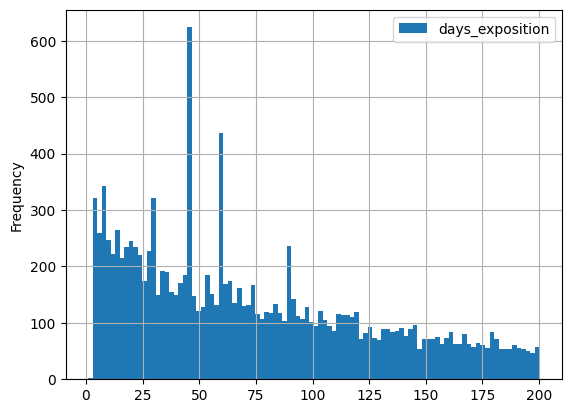

In [145]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
plt.show()

Видны скачки на 45, 60 и 90 день. Возможно это не продажи, а автоматичесткое снятие объявлений с ресурсов Авито, Циан и проч. 
***Тогда квартира размещается повторно и срок обнуляется?
Также есть небольшое количество продаж со срок 0 дней, но их игнорируем.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Зависимость общей (полной)  стоимости от общей площади квартиры

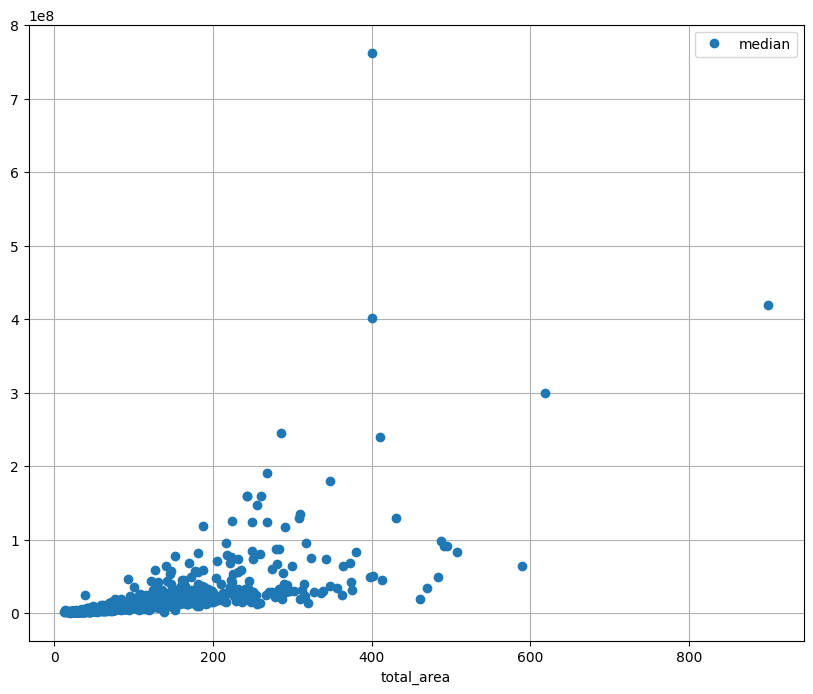

In [146]:
last_price_vs_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
last_price_vs_total_area.columns = ['mean', 'count', 'median']
last_price_vs_total_area.plot(y = 'median', style = 'o', grid=True, figsize=(10, 8))
plt.show()

In [115]:
data['total_area'].corr(data['last_price'])

0.6318349870409659

Корреляция не высокая. С увеличением общнй площади квартиры дорожают, но не сильно.

##### Зависимость общей (полной)  стоимости от жилой площади

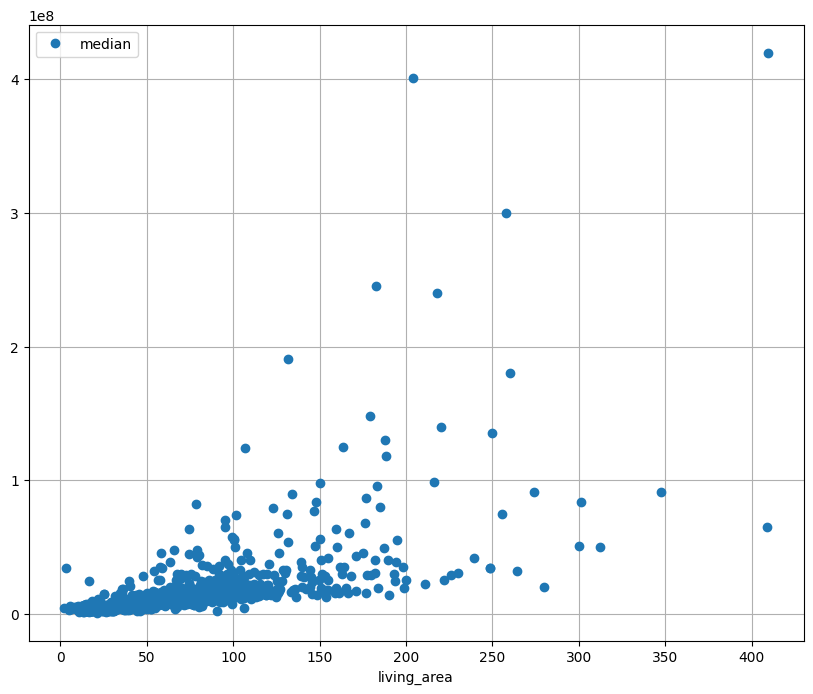

In [116]:
last_price_vs_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
last_price_vs_living_area.columns = ['mean', 'count', 'median']
last_price_vs_living_area.plot(y = 'median', style = 'o', grid=True, figsize=(10, 8))
plt.show()

In [117]:
data['living_area'].corr(data['last_price'])

0.5574887118379235

Корреляция еще ниже. С увеличением жилой площади квартиры дорожают, но не сильно.

##### Зависимость общей (полной) стоимости от площади кухни

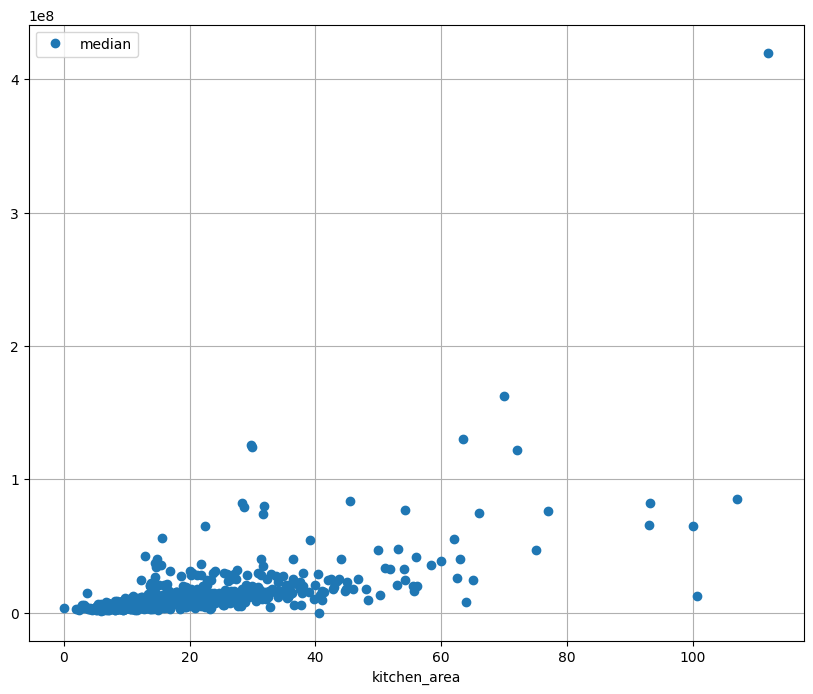

In [118]:
last_price_vs_kitchen_area = (data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median']))
last_price_vs_kitchen_area.columns = ['mean', 'count', 'median']
last_price_vs_kitchen_area.plot(y = 'median', style = 'o', grid=True, figsize=(10, 8))
plt.show()

In [119]:
data['kitchen_area'].corr(data['last_price'])

0.4086711187624881

Корреляция еще ниже. С увеличением площади кухни квартиры дорожают незначительно.

##### Зависимость общей (полной)  стоимости от количества комнат

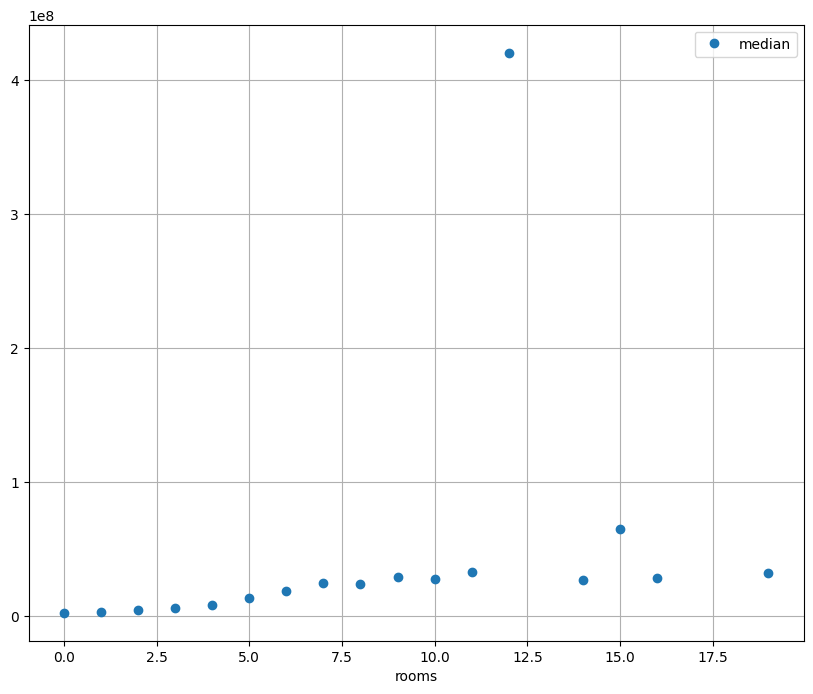

In [120]:
last_price_vs_rooms = (data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median']))
last_price_vs_rooms.columns = ['mean', 'count', 'median']
last_price_vs_rooms.plot(y = 'median', style = 'o', grid=True, figsize=(10, 8))
plt.show()

In [121]:
data['rooms'].corr(data['last_price'])

0.3540667440119321

Корреляция опять снизилась. Общая стоимость квартир в меньшей степени зависит от количества комнат.

##### Зависимость общей (полной)  стоимости от этажа

In [122]:
last_price_vs_floor_type = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median')
                           
last_price_vs_floor_type.columns = ['median']
last_price_vs_floor_type

,median
floor_type,
другой,4700000.0
первый,3850000.0
последний,4300000.0


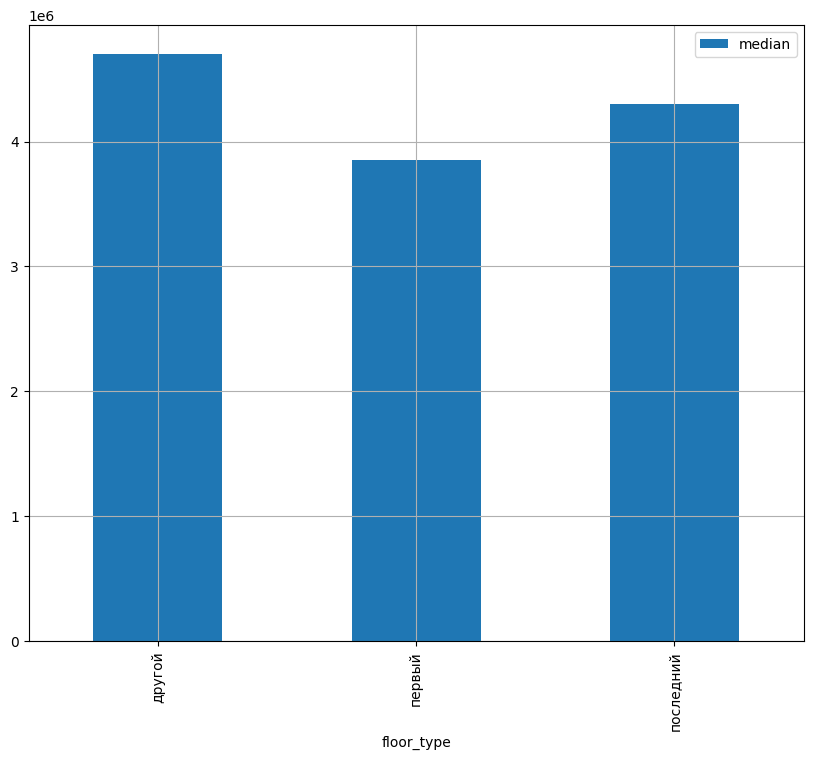

In [123]:
last_price_vs_floor_type.plot(y = 'median', kind = 'bar', grid=True, figsize=(10, 8))
plt.show()

Просматривается зависимость цены за 1 кв.м. от этажа. Квартиры на первом этаже на 10% дешевле, чем на высоких этажах. Квартиры, расположенные на "других" этажах еще дороже на 10%.

##### Зависимость общей (полной)  стоимости от даты размещения (день недели, месяц, год)

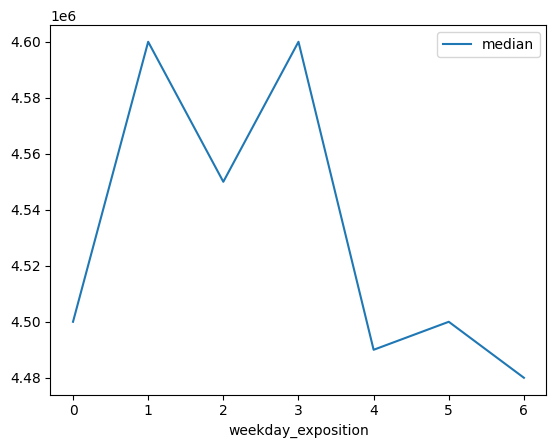

In [147]:
price_vs_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc =  'median')
price_vs_weekday_exposition.columns = ['median']

price_vs_weekday_exposition.plot(y = 'median')
plt.show()

In [125]:
price_vs_weekday_exposition.sort_values('median', ascending = False)

,median
weekday_exposition,
1,4600000.0
3,4600000.0
2,4550000.0
0,4500000.0
5,4500000.0
4,4490000.0
6,4480000.0


Самая высокая стоимость квартир размещнных во вторник и четверг.К выходным сзаметный спад. Возможно опять, как и с размещением объявлений, в выходные размещением объявлений заниются агентства недвижимости.

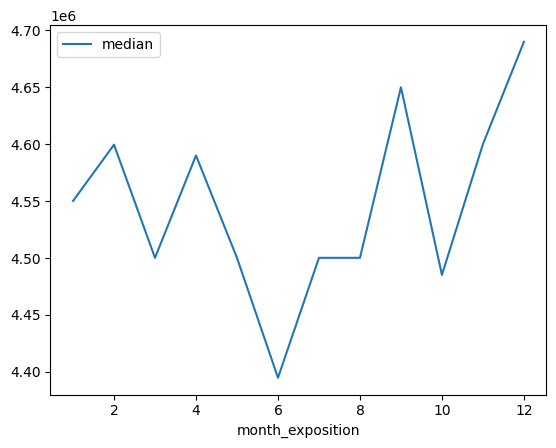

In [148]:
price_vs_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc =  'median')
price_vs_month_exposition.columns = ['median']

price_vs_month_exposition.plot(y = 'median')
plt.show()

In [127]:
price_vs_month_exposition.sort_values('median', ascending = False)

,median
month_exposition,
12,4690000.0
9,4650000.0
11,4600000.0
2,4599500.0
4,4590000.0
1,4550000.0
3,4500000.0
5,4500000.0
7,4500000.0


Самая высокая стоимость квартир размещнных в сентябре и декабре. Минимум приходится на июнь. Очевидно сентябрь - начало учебного года, что часто является причиной переезда. В декабре падает количество размещений, возможно это сказывается на цене. Летом спад очевидно свзан с периодом отпуском.

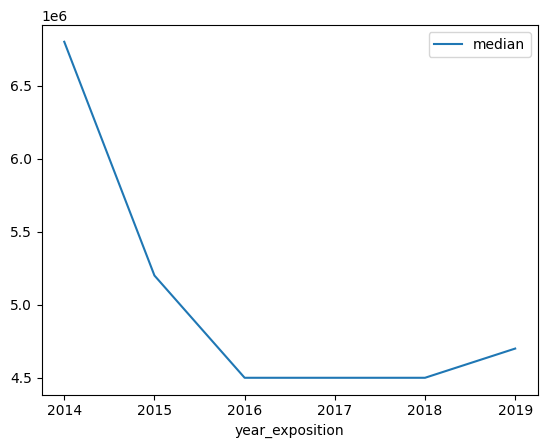

In [149]:
price_vs_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc =  'median')
price_vs_year_exposition.columns = ['median']

price_vs_year_exposition.plot(y = 'median')
plt.show()

In [129]:
price_vs_year_exposition.sort_values('median', ascending = False)

,median
year_exposition,
2014,6800000.0
2015,5200000.0
2019,4700000.0
2016,4500000.0
2017,4500000.0
2018,4500000.0


Цены резко падают в 2015 году и продолжают снижать с 2016 году. В 2019 цены немного на пошли вверх.

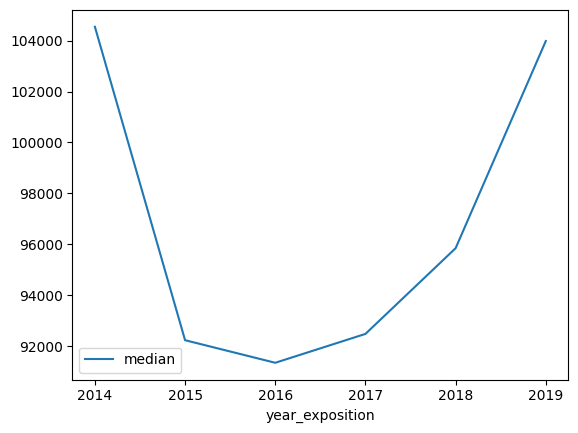

In [150]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_1m', aggfunc = 'median')
pivot_table_year_exposition.columns = ['median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)
plt.show()

Цены за 1 кв.м. также резко снижаются в 2015 году и продолжают снижаться в 2016 году. Но рост уже виден в 2017 и продолжает резко идти вверх в следующие года. Проверим среднее изменение площадей квартир. Рост цен связан с появлением программ по льготной ипотеке.

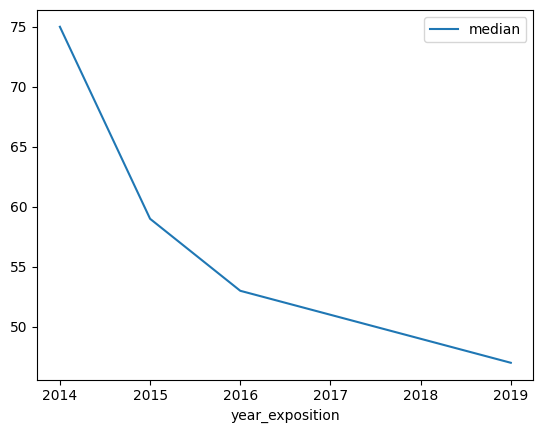

In [151]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = 'median')
pivot_table_year_exposition.columns = ['median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)
plt.show()

Из графика видно, в среднем площадь квартир начала снижаться и довольно резко как раз в 2015 году, что повлияло не снижение средней стоимость квартиры.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [132]:
#10 населённых пунктов с наибольшим числом объявлений
locality = data.pivot_table(index = 'locality_name', values = 'price_per_1m', aggfunc=['count', 'mean', 'median'])
locality.columns = ['count', 'mean', 'median']
locality.sort_values('median', ascending = False).head(10)

,count,mean,median
locality_name,,,
деревня Бор,1,105539.260000,105539.260
Санкт-Петербург,12629,111876.620215,102841.680
Зеленогорск,21,111332.344762,100000.000
Кудрово,132,98830.738636,98660.675
Сестрорецк,149,100906.699396,98341.230
Пушкин,286,102530.039720,97988.680
деревня Кудрово,262,92702.184313,92565.810
поселок Парголово,277,89816.024043,91428.570
деревня Мистолово,7,88716.445714,88265.010


In [133]:
#самая высокая стоимость
locality[locality['median']==locality['median'].max()]

,count,mean,median
locality_name,,,
деревня Бор,1,105539.26,105539.26


In [134]:
data[data['locality_name'] == 'деревня Бор']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1m,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
11800,1,20295200,192.3,2018-02-13,6,2.95,2.0,147.2,1,False,...,NaN,0.0,NaN,162.0,105539.26,1,2,2018,первый,NaN


    Всего 1 объявление в этой локации, вывода о том почему тут самая высокая цена делать сложно. Больше похоже на статистический выброс.

In [135]:
#самая низкая стоимость
locality[locality['mean']==locality['mean'].min()]

,count,mean,median
locality_name,,,
деревня Старополье,1,10368.66,10368.66


Пренебрегнув единственным объвлением в деревне Бор статистика выглядит правдоподобно. Самые дорогие квартиры в Санкт-Петербурге и близлижайших насленных пунктах.

####  Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра до центра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [136]:
# квартиры в Санкт-Петербурге с сортировкой
spb_flats = data.query('locality_name == "Санкт-Петербург"').sort_values('cityCenters_nearest_km', ascending = False)
spb_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1m,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
13031,16,4200000,56.8,2018-07-04,2,3.50,3.0,27.9,1,True,...,NaN,0.0,NaN,187.0,73943.66,2,7,2018,первый,29.0
19892,20,4370000,54.7,2016-03-23,3,2.50,5.0,32.8,5,True,...,NaN,0.0,NaN,939.0,79890.31,2,3,2016,последний,29.0
12160,8,2450000,43.0,2018-08-14,1,2.75,5.0,16.0,1,True,...,NaN,0.0,NaN,8.0,56976.74,1,8,2018,первый,29.0
11652,16,4700000,51.0,2016-06-07,2,2.60,5.0,30.0,1,True,...,NaN,0.0,NaN,539.0,92156.86,1,6,2016,первый,29.0
10798,10,4850000,62.0,2017-05-16,3,2.65,5.0,35.7,1,False,...,NaN,0.0,NaN,63.0,78225.81,1,5,2017,первый,29.0


In [137]:
# проверка пропусков
spb_flats['cityCenters_nearest_km'].isna().sum()

22

In [138]:
spb_flats['cityCenters_nearest_km'].dropna()

13031    29.0
19892    29.0
12160    29.0
11652    29.0
10798    29.0
         ... 
2988      0.0
8614      0.0
11723     0.0
1109      0.0
13919     0.0
Name: cityCenters_nearest_km, Length: 12607, dtype: float64

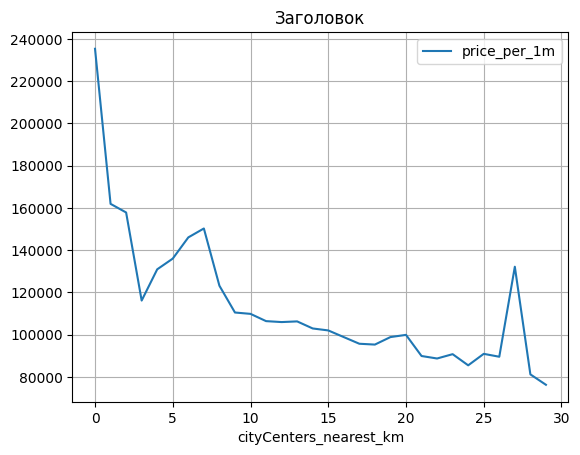

In [152]:
price_km = spb_flats.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_1m', aggfunc = 'mean')
price_km.plot(grid = True, title = 'Заголовок')
plt.show()

In [140]:
price_km.head(10)

,price_per_1m
cityCenters_nearest_km,
0.0,235287.875556
1.0,161878.466258
2.0,157804.332583
3.0,116109.424253
4.0,130893.405066
5.0,135969.635007
6.0,146002.908301
7.0,150224.879286
8.0,123136.817769


С увеличением расстояния до центра цены ожидаемо снижаются, но не равномерно, что предположительно связано с районами престижными и менее престижными и с домами старый фонд/новостойки.

### Общий вывод

В результате проведенного анализа выявили следующие общие тенденции: 
1) Цена не сильно зависит от площади и количества комнат, цена увеличивается, но не сильно.
2) Этаж влияет на стоимость, но самые дорогие картиры не на последних этажах, последние этажи дешевле "других" в среднем днао 10%
3) Увеличиалсь доля квартир меньшей площади, снижение площади более 30%
4) В зависимости от даты размещения дороже всего квартиры осенью (сентябрь и ноябрь), размещенные во вторник и четверг. Спад в течение года в летний период - июль, в течение недели - выходные.
5) В 2016 цены были минимальными. С 2017 цены на квартиры пошли резко вверх. Предположительно рост цен связан с появлением программ по льготной ипотеке.
Самые высокие цены в Санкт-Петербурге и близлежайших к северной столице городах. Самые низкие цены в отдаленных местах как деревня Старополье.
Цены в центре Санкт-Петербурга в 2 раза выше, чем ина окраине.